In [21]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score, roc_auc_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def akurasi_kelas_generatif(y_true, y_pred):
    # Calculate accuracy specifically for class 3
    class_3_mask = (y_true == 3)
    if np.any(class_3_mask):  # Check if class 3 is present in the true labels
        return accuracy_score(y_true[class_3_mask], y_pred[class_3_mask])
    else:
        return 0.0  # Return 0 if class 3 is not present in the true labels

def akurasi_fase_padi(y_true, y_pred):
    # Calculate accuracy specifically for classes 1, 2, 3, and 4
    class_1234_mask = (y_true >= 1) & (y_true <= 4)
    if np.any(class_1234_mask):  # Check if classes 1,2,3,4 are present in the true labels
        return accuracy_score(y_true[class_1234_mask], y_pred[class_1234_mask])
    else:
        return 0.0  # Return 0 if none of the classes 0-3 are present in the true labels

In [3]:
kdprov = '32'
df_est_32=pd.read_csv(f'/data/ksa/05_Modelling/metrics_results/{kdprov}_forestimation.csv',sep=';')

In [4]:
kdprov = '16'
df_est_16=pd.read_csv(f'/data/ksa/05_Modelling/metrics_results/{kdprov}_forestimation.csv',sep=';')

In [5]:
kdprov = '73'
df_est_73=pd.read_csv(f'/data/ksa/05_Modelling/metrics_results/{kdprov}_forestimation.csv',sep=';')

In [17]:
cm_period={}
acc_fase_period_32={}
df_for_estimation=df_est_32
for i in df_for_estimation.periode.unique():
    df_x=df_for_estimation.query('periode==@i')
    y_true=df_x['observation']
    y_pred_center=df_x['center_pred']
    y_pred_dom=df_x['dom_pred']
    cm_center = confusion_matrix(y_true, y_pred_center)
    cm_dom = confusion_matrix(y_true, y_pred_dom)
    cm_center= cm_center.astype('float') / cm_center.sum(axis=1, keepdims=True) * 100
    cm_dom= cm_dom.astype('float') / cm_dom.sum(axis=1, keepdims=True) * 100
    cm=cm_center
    relative_acc_center = 100 * (sum(cm[1, 1:3]) + sum(cm[1, 5:6]) + 
                          sum(cm[2, 1:4]) + 
                          sum(cm[3, 2:5]) + 
                          sum(cm[4, 3:6]) + 
                          sum(cm[5, 4:6])+sum(cm[5,1:2])) / sum(sum(cm[1:6, 1:6]))
    acc_center=[]
    for j in range(7):
        acc_center.append(cm_center[j,j])
    acc_center.append(accuracy_score(y_true, y_pred_center))
    acc_center.append(akurasi_fase_padi(y_true, y_pred_center))
    acc_center.append(relative_acc_center)
    acc_fase_period_32[i]={'center':acc_center}
acc_fase_data_32=pd.DataFrame(acc_fase_period_32).T.reset_index()
acc_fase_data_32['center']=acc_fase_data_32.center.apply(lambda y: np.array(y))
acc_cent_32=[]
for i in range(acc_fase_data_32.shape[0]):
    acc_cent_32.append(acc_fase_data_32['center'][i][9])
    

In [19]:
cm_period={}
acc_fase_period_16={}
df_for_estimation=df_est_16
for i in df_for_estimation.periode.unique():
    df_x=df_for_estimation.query('periode==@i')
    y_true=df_x['observation']
    y_pred_center=df_x['center_pred']
    y_pred_dom=df_x['dom_pred']
    cm_center = confusion_matrix(y_true, y_pred_center)
    cm_dom = confusion_matrix(y_true, y_pred_dom)
    cm_center= cm_center.astype('float') / cm_center.sum(axis=1, keepdims=True) * 100
    cm_dom= cm_dom.astype('float') / cm_dom.sum(axis=1, keepdims=True) * 100
    cm=cm_center
    relative_acc_center = 100 * (sum(cm[1, 1:3]) + sum(cm[1, 5:6]) + 
                          sum(cm[2, 1:4]) + 
                          sum(cm[3, 2:5]) + 
                          sum(cm[4, 3:6]) + 
                          sum(cm[5, 4:6])+sum(cm[5,1:2])) / sum(sum(cm[1:6, 1:6]))
    acc_center=[]
    for j in range(7):
        acc_center.append(cm_center[j,j])
    acc_center.append(accuracy_score(y_true, y_pred_center))
    acc_center.append(akurasi_fase_padi(y_true, y_pred_center))
    acc_center.append(relative_acc_center)
    acc_fase_period_16[i]={'center':acc_center}
acc_fase_data_16=pd.DataFrame(acc_fase_period_16).T.reset_index()
acc_fase_data_16['center']=acc_fase_data_16.center.apply(lambda y: np.array(y))
acc_cent_16=[]
for i in range(acc_fase_data_16.shape[0]):
    acc_cent_16.append(acc_fase_data_16['center'][i][9])
    

In [20]:
cm_period={}
acc_fase_period_73={}
df_for_estimation=df_est_73
for i in df_for_estimation.periode.unique():
    df_x=df_for_estimation.query('periode==@i')
    y_true=df_x['observation']
    y_pred_center=df_x['center_pred']
    y_pred_dom=df_x['dom_pred']
    cm_center = confusion_matrix(y_true, y_pred_center)
    cm_dom = confusion_matrix(y_true, y_pred_dom)
    cm_center= cm_center.astype('float') / cm_center.sum(axis=1, keepdims=True) * 100
    cm_dom= cm_dom.astype('float') / cm_dom.sum(axis=1, keepdims=True) * 100
    cm=cm_center
    relative_acc_center = 100 * (sum(cm[1, 1:3]) + sum(cm[1, 5:6]) + 
                          sum(cm[2, 1:4]) + 
                          sum(cm[3, 2:5]) + 
                          sum(cm[4, 3:6]) + 
                          sum(cm[5, 4:6])+sum(cm[5,1:2])) / sum(sum(cm[1:6, 1:6]))
    acc_center=[]
    for j in range(7):
        acc_center.append(cm_center[j,j])
    acc_center.append(accuracy_score(y_true, y_pred_center))
    acc_center.append(akurasi_fase_padi(y_true, y_pred_center))
    acc_center.append(relative_acc_center)
    acc_fase_period_73[i]={'center':acc_center}
acc_fase_data_73=pd.DataFrame(acc_fase_period_73).T.reset_index()
acc_fase_data_73['center']=acc_fase_data_73.center.apply(lambda y: np.array(y))
acc_cent_73=[]
for i in range(acc_fase_data_73.shape[0]):
    acc_cent_73.append(acc_fase_data_73['center'][i][9])
    

In [27]:
dict_date={
    '2022_03':'2022_01',
    '2022_05':'2022_02',
    '2022_08':'2022_03',
    '2022_10':'2022_04',
    '2022_13':'2022_05',
    '2022_15':'2022_06',
    '2022_18':'2022_07',
    '2022_20':'2022_08',
    '2022_23':'2022_09',
    '2022_25':'2022_10',
    '2022_28':'2022_11',
    '2022_30':'2022_12',
    '2023_03':'2023_01',
    '2023_05':'2023_02',
    '2023_08':'2023_03',
    '2023_10':'2023_04',
    '2023_13':'2023_05',
    '2023_15':'2023_06',
    '2023_18':'2023_07',
    '2023_20':'2023_08',
    '2023_23':'2023_09',
    '2023_25':'2023_10',
    '2023_28':'2023_11',
    '2023_30':'2023_12'
}

In [28]:
x

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304,
       202305, 202306, 202307, 202308, 202309, 202310, 202311, 202312])

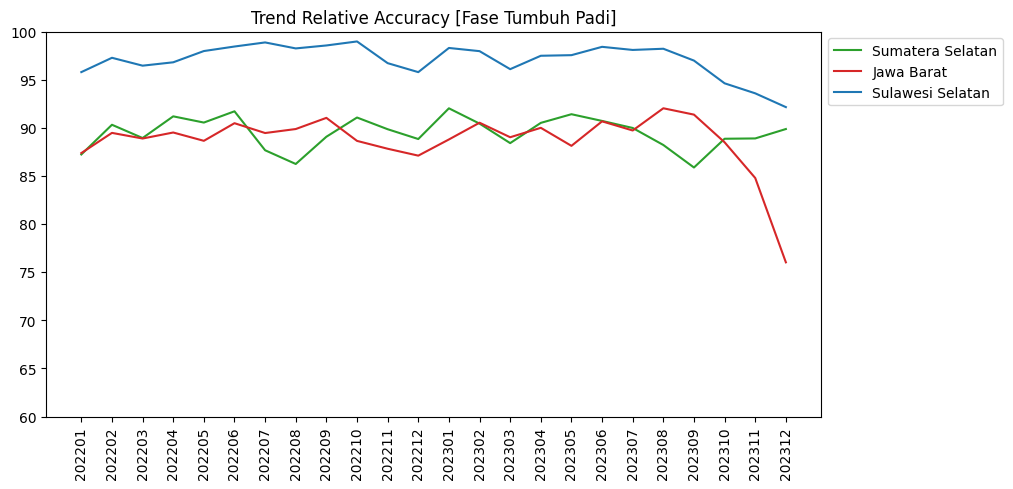

In [31]:
acc_fase_data=pd.DataFrame(acc_fase_period_73).T.reset_index()
x=acc_fase_data['index'].astype(str).to_numpy()
plt.figure(figsize=(10, 5))
plt.plot(x, acc_cent_16, label='Sumatera Selatan', color='tab:green')
plt.plot(x, acc_cent_32, label='Jawa Barat', color='tab:red')
plt.plot(x, acc_cent_73, label='Sulawesi Selatan', color='tab:blue')
#plt.plot(x, acc_dom, linestyle='--', label='Dominant', color='tab:red')
plt.ylim(60,100)
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Trend Relative Accuracy [Fase Tumbuh Padi]')
#plt.savefig(f'/data/ksa/05_Modelling/metrics_results/{kdprov}_relacc_tred.png', dpi=300, bbox_inches='tight')
plt.show()

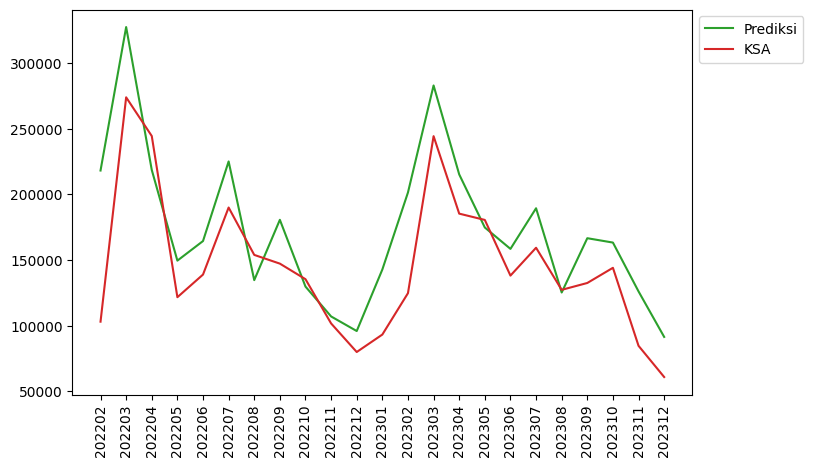

In [74]:
dt_est_jabar=pd.read_csv('/data/ksa/08_Estimasi/2024-10-17 13_50_59.828741 output_est_final_32.csv')
index_=dt_pred_32.periode.unique().tolist()
index_=[str(i) for i in index_]
plt.figure(figsize=(8, 5))
dt_pred_32=dt_est_jabar.query('strati=="ALL"').query('id_kab==3200').query('variable=="panen_total"').query('jenis_data=="fase_pred"')
plt.plot(index_, dt_pred_32.total_weighted.to_list(), label='Prediksi', color='tab:green')
dt_pred_32=dt_est_jabar.query('strati=="ALL"').query('id_kab==3200').query('variable=="panen_total"').query('jenis_data=="fase_obs"')
plt.plot(index_, dt_pred_32.total_weighted.to_list(), label='KSA', color='tab:red')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

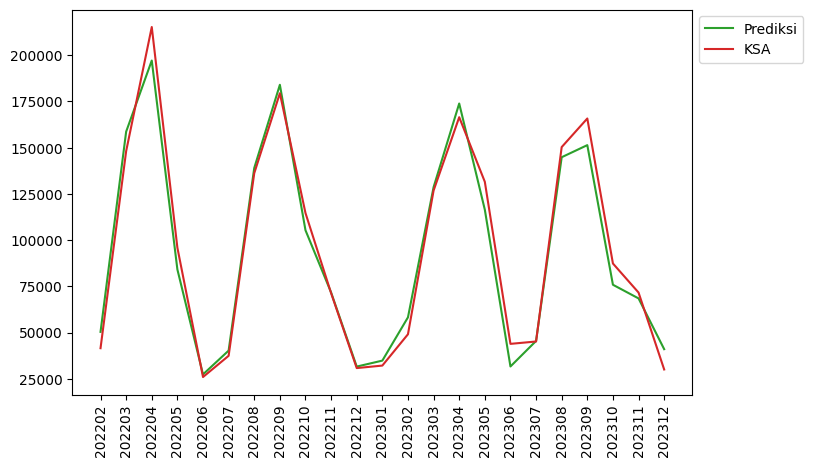

In [73]:
dt_est_suisel=pd.read_csv('/data/ksa/08_Estimasi/2024-10-23 16_54_56.804171 output_est_final_73.csv')
plt.figure(figsize=(8, 5))
dt_pred_73=dt_est_suisel.query('strati=="ALL"').query('id_kab==7300').query('variable=="panen_total"').query('jenis_data=="fase_pred"')
plt.plot(index_, dt_pred_73.total_weighted.to_list(), label='Prediksi', color='tab:green')
dt_pred_73=dt_est_suisel.query('strati=="ALL"').query('id_kab==7300').query('variable=="panen_total"').query('jenis_data=="fase_obs"')
plt.plot(index_, dt_pred_73.total_weighted.to_list(), label='KSA', color='tab:red')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

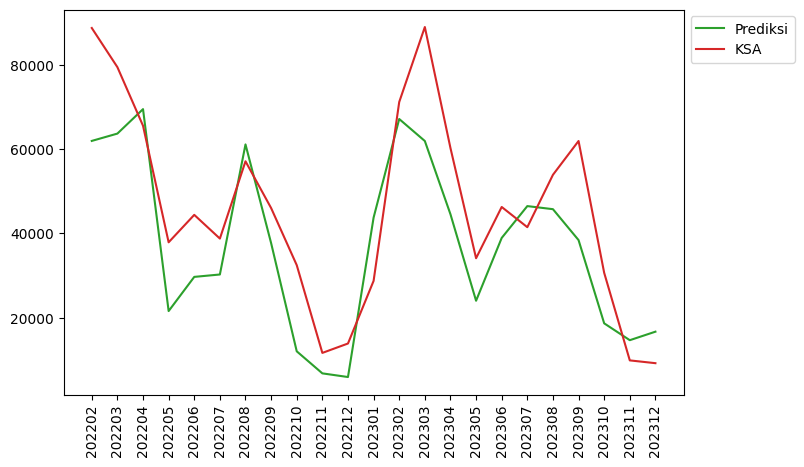

In [75]:
dt_est_sumsel=pd.read_csv('/data/ksa/08_Estimasi/2024-10-31 08_09_29.656778 output_est_final_16.csv')
plt.figure(figsize=(8, 5))
dt_pred_16=dt_est_sumsel.query('strati=="ALL"').query('id_kab==1600').query('variable=="panen_total"').query('jenis_data=="fase_pred"')
plt.plot(index_, dt_pred_16.total_weighted.to_list(), label='Prediksi', color='tab:green')
dt_pred_16=dt_est_sumsel.query('strati=="ALL"').query('id_kab==1600').query('variable=="panen_total"').query('jenis_data=="fase_obs"')
plt.plot(index_, dt_pred_16.total_weighted.to_list(), label='KSA', color='tab:red')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()